Getting the project root path

In [1]:
import os
root = os.path.dirname(os.getcwd())

Loading the data

In [2]:
import pandas as pd

data = pd.read_csv(os.path.join(root, "data", "raw", "test_data_CANDIDATE.csv"))
data.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,nar,hc,sk,trf
0,0,49,M,10000,130,269.0,0,1,163,0,0.0,2.0,0,2,2,0,1,6797.761892
1,1,61,F,10000,138,166.0,0,0,125,1,3.6,NaN,1,2,2,1,3,4307.686943
2,2,46,F,10000,140,311.0,0,1,120,1,1.8,NaN,2,3,2,0,1,4118.077502
3,3,69,F,10000,140,254.0,0,0,146,0,2.0,1.0,3,3,2,1,0,7170.849469
4,4,51,F,10000,100,222.0,0,1,143,1,1.2,1.0,0,2,2,1,0,5579.040145


The data in this column is irrelevant

In [3]:
del data['cp']

Cheacking if each column has num values

In [4]:
 data.isna().any()

index       False
age         False
sex         False
trestbps    False
chol         True
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope        True
ca          False
thal        False
nar         False
hc          False
sk          False
trf         False
dtype: bool

There is missing data on the chol and slope columns

The chol could be replaced by the mean, but the slop will be needing a furder analisys.

Cheack amount of null for each gender and the mean of chol

In [5]:
# Treating different names for male and female
data.sex = data.sex.replace('f', 'F')
data.sex = data.sex.replace('m', 'M')

In [6]:
male = data.sex == 'M'
male_mean = int(data[male].chol.mean())
male_amount = data[male].chol.isna().sum()

female = data.sex == 'F'
female_mean = int(data[female].chol.mean())
female_amount = data[female].chol.isna().sum()

print("Chol male mean({}), amount ({})".format(male_mean, male_amount))
print("Chol female mean({}), amount({})".format(female_mean, female_amount))


Chol male mean(262), amount (1)
Chol female mean(236), amount(15)


This number could sujest that if the the value chol is nan its probably gonna be a female, but since I presume that is just a coinsidence I will not do something about. 

Since female is the biggest gend the missing data will be filled by the female mean.

In [7]:
data.chol = data.chol.fillna(female_mean)

Check amount of each gender for base line model

In [8]:
print(" Male: {} \n Female: {}".format(len(data[male]), len(data[female])))

 Male: 92 
 Female: 196


Any model with acc bellow ≃69% in this dataset is will poblaby not be good enough.

Looking for patterns or outlayers

Age Density plot by gender

In [9]:
data[female].age.plot.kde()

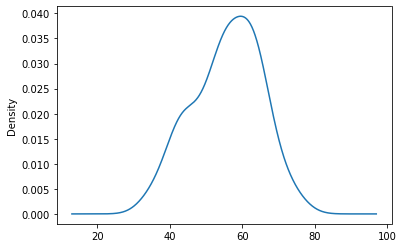

In [10]:
data[male].age.plot.kde()

Setting dummy variables for sex

In [11]:
print(pd.get_dummies(data.sex))
data = pd.concat([data, pd.get_dummies(data.sex)], axis=1).drop(['sex'], axis=1)

     F  M
0    0  1
1    1  0
2    1  0
3    1  0
4    1  0
..  .. ..
283  1  0
284  1  0
285  0  1
286  1  0
287  1  0

[288 rows x 2 columns]
